In [1]:
import numpy 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# total images (train, test)
len(x_train), len(x_test)

(60000, 10000)

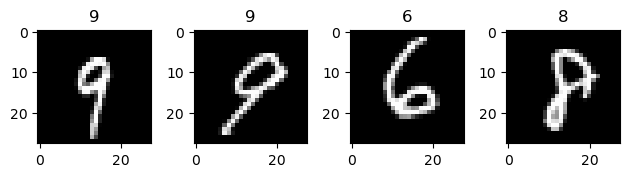

In [43]:
# Plot few images
fig, ax = plt.subplots(1, 4)

plt.subplot(1,4,1)
plt.title(y_train[600])
plt.imshow(x_train[600], cmap=plt.get_cmap('gray'))

plt.subplot(1,4,2)
plt.title(y_train[601])
plt.imshow(x_train[601], cmap=plt.get_cmap('gray'))

plt.subplot(1,4,3)
plt.imshow(x_test[600], cmap=plt.get_cmap('gray'))
plt.title(y_test[600])

plt.subplot(1,4,4)
plt.imshow(x_test[601], cmap=plt.get_cmap('gray'))
plt.title(y_test[601])

fig.tight_layout()
plt.show()

In [19]:
# shape of each image
x_train[0].shape

(28, 28)

In [20]:
total_pixel_single_image = x_train[0].shape[0]*x_train[0].shape[1]
total_pixel_single_image

784

#### Add noise

In [22]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_train[0].shape)
x_test_noisy = x_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=x_test[0].shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [93]:
x_train = x_train / 255.0
x_test = x_test / 255.0
# reduce images
x_train_noisy = x_train_noisy / 255.0 
x_test_noisy = x_test_noisy / 255.0 

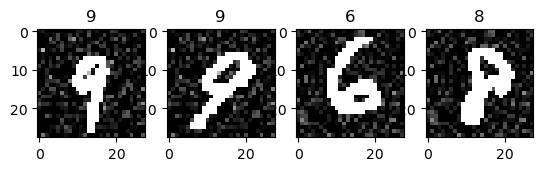

In [94]:
# Plot few images
fig, ax = plt.subplots(1, 4)

plt.subplot(1,4,1)
plt.title(y_train[600])
plt.imshow(x_train_noisy[600], cmap=plt.get_cmap('gray'))

plt.subplot(1,4,2)
plt.title(y_train[601])
plt.imshow(x_train_noisy[601], cmap=plt.get_cmap('gray'))

plt.subplot(1,4,3)
plt.imshow(x_test_noisy[600], cmap=plt.get_cmap('gray'))
plt.title(y_test[600])

plt.subplot(1,4,4)
plt.imshow(x_test_noisy[601], cmap=plt.get_cmap('gray'))
plt.title(y_test[601])

# fig.tight_layout()
plt.show()

#### Model

In [101]:
# The encoder

x = tf.keras.layers.Input(shape=(28, 28, 1))
x_e = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x_e = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x_e)
x_e = tf.keras.layers.BatchNormalization()(x_e)
x_e = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x_e)
x_e = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x_e)
x_e = tf.keras.layers.BatchNormalization()(x_e)

In [102]:
# The decoder

x_d = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x_e)
x_d = tf.keras.layers.UpSampling2D((2, 2))(x_d)
x_d = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x_d)
x_d = tf.keras.layers.UpSampling2D((2, 2))(x_d)
x_d = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x_d)

In [103]:
model = tf.keras.Model(x, x_d)
model.compile(optimizer='adam', loss='mse')

In [104]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 14, 14, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0  

In [105]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=10, batch_size=16, callbacks=[early_stop])

Epoch 1/10


2022-12-10 01:34:45.015798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3746/3750 [============================>.] - ETA: 0s - loss: 0.0093

2022-12-10 01:35:21.590867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3750/3750 [==============================] - 40s 10ms/step - loss: 0.0093 - val_loss: 0.0073
Epoch 2/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 3/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0065 - val_loss: 0.0073
Epoch 4/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 5/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 6/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0061 - val_loss: 0.0356
Epoch 7/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0061 - val_loss: 0.1139
Epoch 8/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0061 - val_loss: 0.0541
Epoch 9/10
3750/3750 [==============================] - 40s 11ms/step - loss: 0.0060 - val_loss: 0.1098
Epoch 10/10
3750/3750 [==============================] - 40s 11ms/step - lo

In [106]:
result = model.predict(x_test_noisy)
model.evaluate(x_test, x_test_noisy)

2022-12-10 01:49:05.934985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 14/313 [>.............................] - ETA: 2s - loss: 0.0542

2022-12-10 01:49:07.991582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0549


0.05490448325872421

In [107]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 2s 5ms/step


Test Images


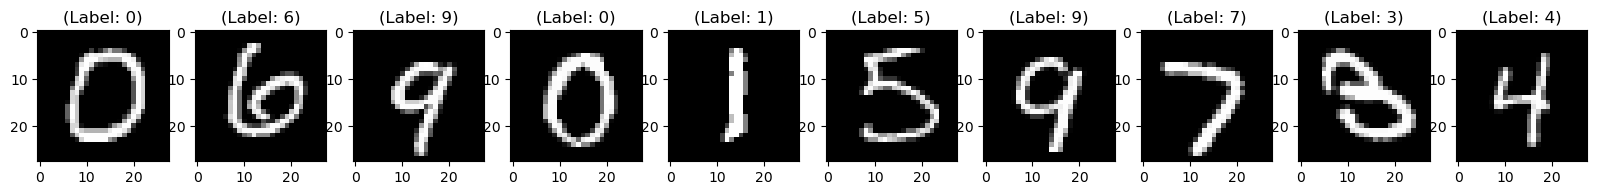

Test Images with Noise


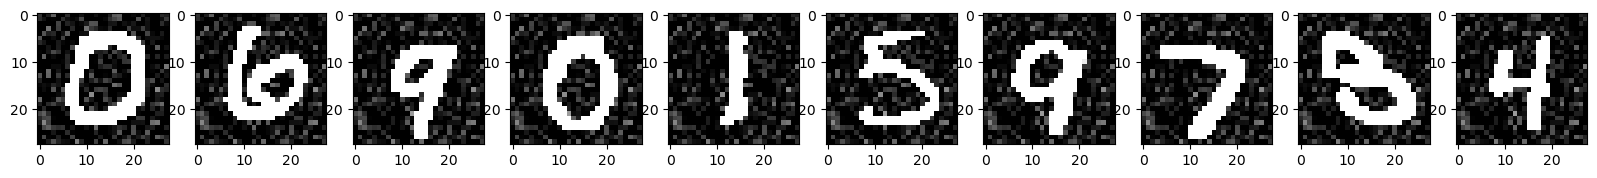

Reconstruction of Noisy Test Images


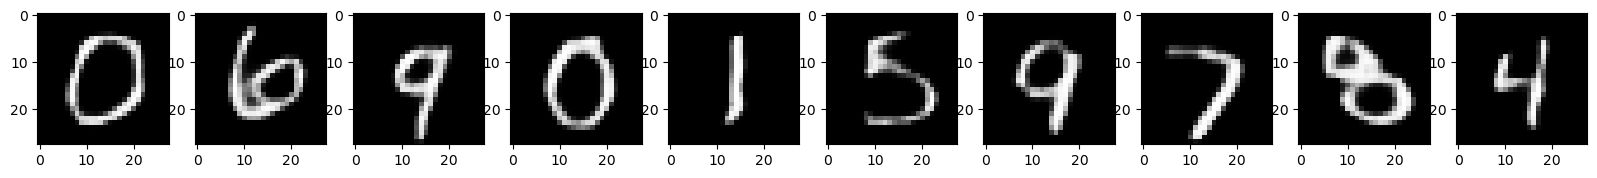

In [109]:
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()